In [24]:
%matplotlib inline
import urllib
from xml.dom import minidom
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def get_count(start, finish, step = 1):
    while start <= finish:
        url_str = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=' + str(start) + '[pdat]'
        xml_str = urllib.request.urlopen(url_str).read()
        xmldoc = minidom.parseString(xml_str)
        value = xmldoc.getElementsByTagName('Count')
        count = value[0].firstChild.nodeValue
        start = start+step
        yield start - step, count

In [26]:
def graph(start, finish, step = 1):
    p_date, articles = [], []
    for date, count in get_count(start, finish, step):
        p_date.append(date)
        articles.append(int(count))
    fig = plt.figure(figsize = (11, 8))
    axes = fig.add_subplot(111)
    axes.plot(p_date, articles, color = 'blue', linewidth = 5, marker = 'o', markerfacecolor = 'white', markeredgecolor = 'blue', 
              markeredgewidth = 5, markersize = 10, label = 'Number of new PubMed-indexed articles')
    axes.set_xlim([start - 1, finish + 1])
    axes.set_ylim([0, (max(articles) // 100000 + 1) * 100000])
    axes.xaxis.set_ticks_position('bottom')
    axes.yaxis.set_ticks_position('left')
    axes.yaxis.grid(linestyle = '-')
    axes.tick_params(labelsize = 18)
    axes.legend(bbox_to_anchor = (0, 1.02, 1, .102), loc = 'upper center', mode = 'expand', fontsize = 24)
    plt.show()

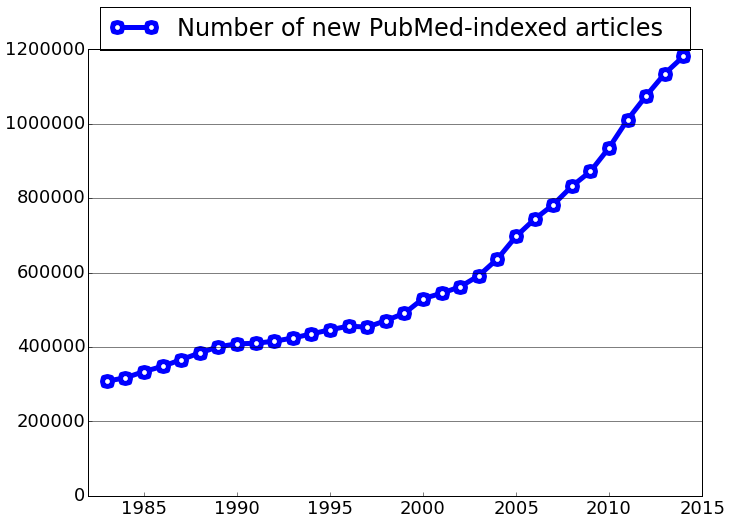

In [27]:
graph(1983, 2014)